# Load Data

In [ ]:
from sklearn.manifold import TSNE

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from time import time
import pandas as pd

In [ ]:
import pickle

with open(f'drive/MyDrive/DATA/2023-05-10 20:22:37.483960-mtx.pkl', 'rb') as inp:
   trials  = pickle.load(inp)

In [ ]:
#data_csv_path = 'drive/MyDrive/DATA/MTX_NAs_Dropped_v2.csv'
data_csv_path = 'drive/MyDrive/DATA/MTX_NAs_Dropped.csv'
#das_score_cols = ['das28_remission_m0','das28_remission_m3','das28_remission_m6','das28_remission_m12']
dat = pd.read_csv(data_csv_path,sep=' ') # in datasets/

In [ ]:
dat=dat.replace(to_replace="male",value="1")
dat=dat.replace(to_replace="female",value="0")
dat.insert(0, "Data_Index", [0 for i in range(len(dat))], True)

In [ ]:
tsne = TSNE(
        n_components=2,
        init="random",
        random_state=0,
        perplexity=40, #30, 50
        n_iter=500,
    )

#Y = tsne.fit_transform(dat)

In [ ]:
dat2= trials[0][0][0]
dat2=dat2.replace(to_replace="male",value="1")
dat2=dat2.replace(to_replace="female",value="0")
dat2.insert(0, "Data_Index", [1 for i in range(len(dat))], True)

In [ ]:
dat3= trials[1][0][0]
dat3=dat3.replace(to_replace="male",value="1")
dat3=dat3.replace(to_replace="female",value="0")
dat3.insert(0, "Data_Index", [2 for i in range(len(dat))], True)

In [ ]:
dat_combined = pd.concat([dat,dat2], ignore_index=True)
dat_combined = pd.concat([dat_combined,dat3], ignore_index=True)

In [ ]:
#dat_combined[dat_combined['Index']==1]

In [ ]:
Y = tsne.fit_transform(dat_combined)

Text(0.5, 1.0, 'Original Data vs. DP-Synthetic (High Epsilon)')

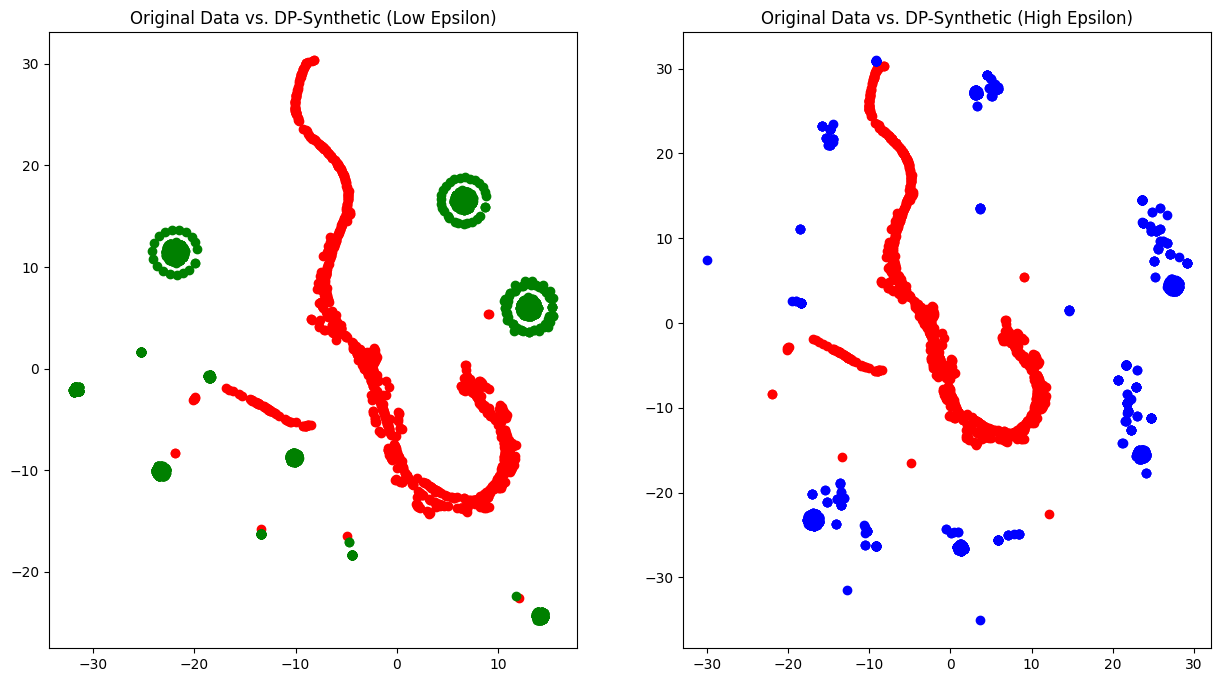

In [ ]:

#plt.plot()
(fig, subplots) = plt.subplots(1, 2, figsize=(15, 8))

org = dat_combined['Data_Index']==0
synth_1 = dat_combined['Data_Index']==1
synth_2 = dat_combined['Data_Index']==2

ax = subplots[0]
ax.scatter(Y[org, 0], Y[org, 1], c="r")
ax.scatter(Y[synth_1, 0], Y[synth_1, 1], c="g")
#ax.set_xlim(left=-20, right=20)
#ax.set_ylim(bottom=-20, top=20)
ax.set_title("Original Data vs. DP-Synthetic (Low Epsilon)")

ax = subplots[1]
ax.scatter(Y[org, 0], Y[org, 1], c="r")
ax.scatter(Y[synth_2, 0], Y[synth_2, 1], c="b")
#ax.set_xlim(left=-20, right=20)
#ax.set_ylim(bottom=-20, top=20)
ax.set_title("Original Data vs. DP-Synthetic (High Epsilon)")